## SATYAM SINGH

In [49]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%matplotlib inline

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)


In [50]:
# See the first 5 rows
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [58]:
## I only chose 2 features as I was going to plot in 2D space. The algorithm will work fine for any number of features.
X = iris_df.iloc[:,[0,2]].values

In [60]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)

#appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans.inertia_)  

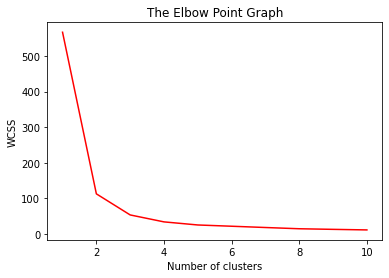

In [61]:
#Plotting The Elbow graph
plt.plot(range(1, 11,1), wcss,'r-')
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
##### From the above graph we can observe that optimum K value is 3. So, we are going to choose the value of 
##### n_clusters as 3

In [63]:
#Fitting K-Means to the dataset
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y=kmeans.fit_predict(X)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

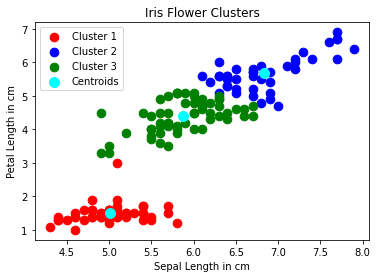

In [64]:
# Visualising the clusters on the 'sepal_length' and 'petal_length' columns

#Scatter plotting for (x,y) with label 1 as Cluster 1 in color c = red 
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 75, c = 'red', label = 'Cluster 1')

#Scatter plotting for (x,y) with label 2 as Cluster 2 in color c = blue 
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 75, c = 'blue', label = 'Cluster 2')

#Scatter plotting for (x,y) with label 3 as Cluster 3 in color c = green 
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 75, c = 'green', label = 'Cluster 3')

#Scatter plotting the centroids with label = 'Centroids' in color c = cyan
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'cyan', label = 'Centroids')

plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()

## TASK 2 COMPLETED